In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from asymopt.desc import  maxminscale,process_desc
from asymopt.ml import model_delta_pred
from rdkit import Chem
import pandas as pd
from asymopt.desc import getmorganfp
import pandas as pd
from rdkit import Chem
from tqdm import tqdm
import numpy as np

In [2]:
com_df = pd.read_csv('../data/processed/com_data.csv')
lit_df = pd.read_csv('../data/processed/lit_data.csv')
lit_df = pd.read_csv('../data/processed/lit_data_with_cplex_smi.csv')
l_rct1_smi_lst,l_rct2_smi_lst,l_metal_lst,l_lig_smi_lst,l_tgt = lit_df['rct_1_smi'].to_list(),lit_df['rct_2_smi'].to_list(),lit_df['metal'].to_list(),lit_df['lig_smi'].to_list(),lit_df['ddG'].to_numpy()
c_rct1_smi_lst,c_rct2_smi_lst,c_metal_lst,c_lig_smi_lst,c_tgt = com_df['rct_1_smi'].to_list(),com_df['rct_2_smi'].to_list(),com_df['metal'].to_list(),com_df['lig_smi'].to_list(),com_df['ddG'].to_numpy()
com_rdkit_arr = np.load("../descriptor/com_rdkit_arr.npy",allow_pickle=True)
lit_rdkit_arr = np.load("../descriptor/lit_rdkit_arr.npy",allow_pickle=True)
lit_fp_arr = np.load("../descriptor/lit_fp_arr.npy")
com_fp_arr = np.load("../descriptor/com_fp_arr.npy")
model = DecisionTreeRegressor(random_state=0)

## Proximity learning with reaction data similarity evaluation

In [18]:
all_test_y,all_test_p,com_r2,com_mae,com_prsr,train_test_data_index = model_delta_pred(com_fp_arr,
                                                                         c_tgt,
                                                                         lit_fp_arr,
                                                                         l_tgt,
                                                                         model,
                                                                         simi=True,
                                                                         dist_type='euclidean',
                                                                         topk=0.4,
                                                                         tgt_simi_desc=com_rdkit_arr,
                                                                         base_simi_desc=lit_rdkit_arr,
                                                                         ret_metrics=True,ret_train_test=True)


In [21]:
for idx,index_pair in enumerate(train_test_data_index):
    train_index,test_index,externel_index = index_pair
    train_df = com_df.iloc[train_index]
    test_df = com_df.iloc[test_index]
    externel_df = lit_df.iloc[externel_index]
    train_df.to_csv(f"../data/dataset_used_in_loo/{idx}_train.csv",index=False)
    test_df.to_csv(f"../data/dataset_used_in_loo/{idx}_test.csv",index=False)
    externel_df.to_csv(f"../data/dataset_used_in_loo/{idx}_externel.csv",index=False)

In [19]:
train_test_data_index

[[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20]),
  array([0]),
  array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  48,  49,  50,
          51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
          64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
          77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
          90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
         103, 104, 105, 106, 107, 116, 118, 119, 120, 121, 122, 134, 135,
         136, 137, 138, 139, 140, 141, 160, 161, 162, 163, 164, 165, 166,
         167, 168, 169, 172, 175, 189, 190, 195, 196, 197, 207, 209, 210,
         212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
         225, 226, 227, 228])],
 [array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20]),
  array([1]),
  array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  48,  49,  50,


In [12]:
all_paper_data_used_in_proximity = np.unique(np.concatenate([item[2] for item in train_test_data_index]))

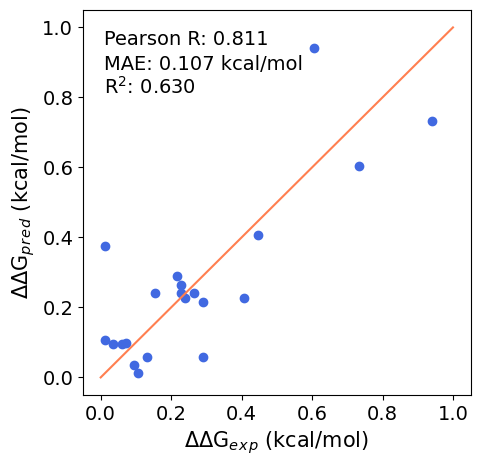

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(all_test_y,all_test_p,c='royalblue')
plt.plot([0,1],[0,1],c='coral')
plt.xlabel('$\Delta$$\Delta$G$_e$$_x$$_p$ (kcal/mol)',fontsize=15)
plt.ylabel('$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)',fontsize=15)
plt.text(0.01,0.95,f'Pearson R: {com_prsr:.3f}',fontsize=14)
plt.text(0.01,0.88,f'MAE: {com_mae:.3f} kcal/mol',fontsize=14)
plt.text(0.01,0.81,f'R$^2$: {com_r2:.3f}',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
print()

## Proximity learning using all Pd data without similarity evaluation

In [3]:
all_test_y,all_test_p,com_r2,com_mae,com_prsr,train_test_data_index = model_delta_pred(com_fp_arr,
                                                                         c_tgt,
                                                                         lit_fp_arr,
                                                                         l_tgt,
                                                                         model,
                                                                         simi=False,
                                                                         dist_type='euclidean',
                                                                         topk=0.4,
                                                                         tgt_simi_desc=com_rdkit_arr,
                                                                         base_simi_desc=lit_rdkit_arr,
                                                                         ret_metrics=True,ret_train_test=True)


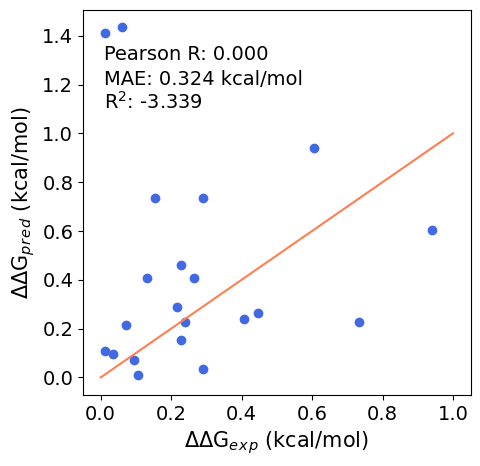

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(all_test_y,all_test_p,c='royalblue')
plt.plot([0,1],[0,1],c='coral')
plt.xlabel('$\Delta$$\Delta$G$_e$$_x$$_p$ (kcal/mol)',fontsize=15)
plt.ylabel('$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)',fontsize=15)
plt.text(0.01,1.3,f'Pearson R: {com_prsr:.3f}',fontsize=14)
plt.text(0.01,1.2,f'MAE: {com_mae:.3f} kcal/mol',fontsize=14)
plt.text(0.01,1.1,f'R$^2$: {com_r2:.3f}',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
print()

## Proximity learning using all Pd data used in `Proximity learning with reaction data similarity evaluation`

In [15]:
all_test_y,all_test_p,com_r2,com_mae,com_prsr,train_test_data_index = model_delta_pred(com_fp_arr,
                                                                         c_tgt,
                                                                         lit_fp_arr[all_paper_data_used_in_proximity],
                                                                         l_tgt[all_paper_data_used_in_proximity],
                                                                         model,
                                                                         simi=False,
                                                                         dist_type='euclidean',
                                                                         topk=0.4,
                                                                         tgt_simi_desc=com_rdkit_arr,
                                                                         base_simi_desc=lit_rdkit_arr,
                                                                         ret_metrics=True,ret_train_test=True)


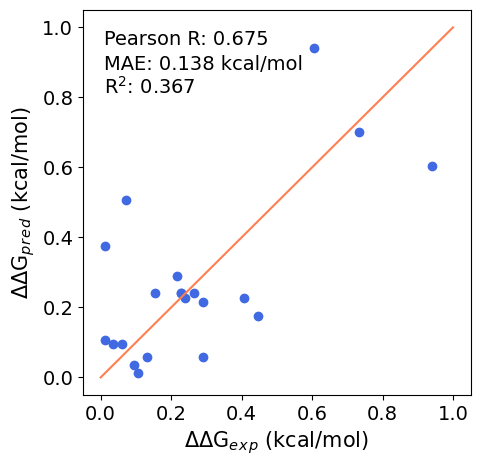

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(all_test_y,all_test_p,c='royalblue')
plt.plot([0,1],[0,1],c='coral')
plt.xlabel('$\Delta$$\Delta$G$_e$$_x$$_p$ (kcal/mol)',fontsize=15)
plt.ylabel('$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)',fontsize=15)
plt.text(0.01,0.95,f'Pearson R: {com_prsr:.3f}',fontsize=14)
plt.text(0.01,0.88,f'MAE: {com_mae:.3f} kcal/mol',fontsize=14)
plt.text(0.01,0.81,f'R$^2$: {com_r2:.3f}',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
print()